<h1>Amazon Sales Dataset</h1>

<h3>About Dataset</h3>

<ul>
    <p>About Columns:</p>
    <li>product_id - Product ID</li>
    <li>product_name - Name of the Product</li>
    <li>category - Category of the Product</li>
    <li>discounted_price - Discounted Price of the Product</li>
    <li>actual_price - Actual Price of the Product</li>
    <li>discount_percentage - Percentage of Discount for the Product</li>
    <li>rating - Rating of the Product</li>
    <li>rating_count - Number of people who voted for the Amazon rating</li>
    <li>about_product - Description about the Product</li>
    <li>user_id - ID of the user who wrote review for the Product</li>
    <li>user_name - Name of the user who wrote review for the Product</li>
    <li>review_id - ID of the user review</li>
    <li>review_title - Short review</li>
    <li>review_content - Long review</li>
    <li>img_link - Image Link of the Product</li>
    <li>product_link - Official Website Link of the Product</li>
</ul>

<h1>Data Overview</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df_amazon_sales = pd.read_csv("amazon.csv")

In [3]:
df_amazon = df_amazon_sales.copy()

In [4]:
df_amazon.shape

(1465, 16)

In [5]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df_amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df_amazon.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
df_amazon.duplicated().sum()

0

In [9]:
df_amazon.drop_duplicates(inplace = True)

In [10]:
df_amazon.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [11]:
df_amazon.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [12]:
df_amazon['discounted_price'] = df_amazon['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df_amazon['actual_price'] = df_amazon['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].str.replace('%', '').str.replace(',', '').astype(float)
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')
df_amazon['rating_count'] = pd.to_numeric(df_amazon['rating_count'].str.replace(',', ''), errors = 'coerce')

In [13]:
df_amazon['rating_count'] = df_amazon['rating_count'].fillna(0)

In [14]:
df_amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18270.564505
std,6944.304394,10874.826864,21.635905,0.291674,42729.995315
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [15]:
df_amazon.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [16]:
df_amazon['rating'] = df_amazon['rating'].fillna(df_amazon['rating'].median())

In [17]:
df_amazon.isna().sum().sum()

0

In [18]:
df_amazon.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

<h1>Outliers</h1>

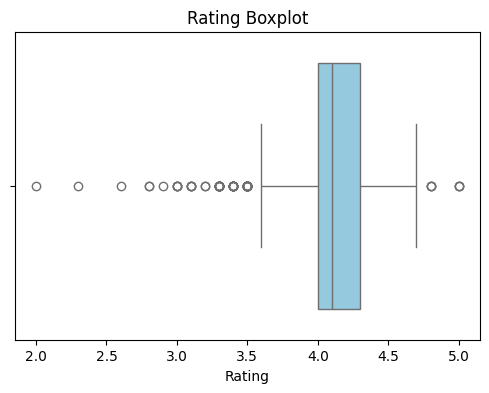

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_amazon['rating'], color='skyblue')
plt.title("Rating Boxplot")
plt.xlabel("Rating")
plt.show()

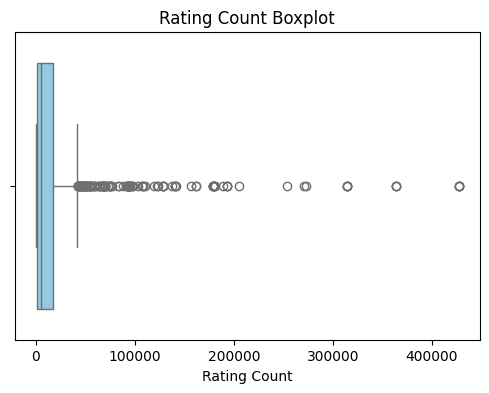

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_amazon['rating_count'], color='skyblue')
plt.title("Rating Count Boxplot")
plt.xlabel("Rating Count")
plt.show()

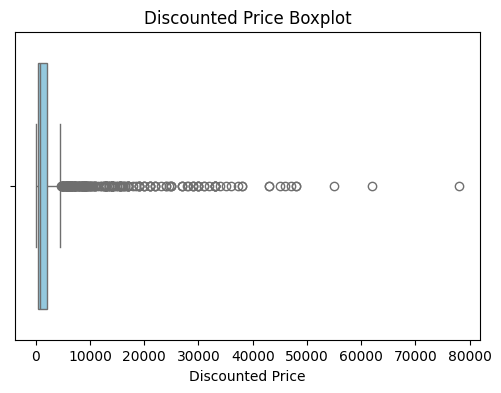

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_amazon['discounted_price'], color='skyblue')
plt.title("Discounted Price Boxplot")
plt.xlabel("Discounted Price")
plt.show()

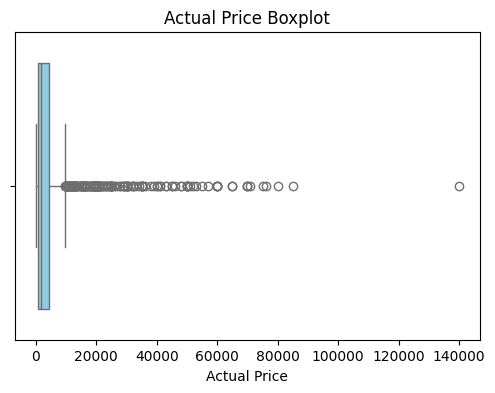

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_amazon['actual_price'], color='skyblue')
plt.title("Actual Price Boxplot")
plt.xlabel("Actual Price")
plt.show()

In [23]:
def find_outliers(df_amazon, column):
    Q1 = df_amazon[column].quantile(0.25)
    Q3 = df_amazon[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df_amazon[column] < lower) | (df_amazon[column] > upper)
    outliers = df_amazon[mask]
    return outliers, lower, upper

In [24]:
out_actual_price, lower, upper  = find_outliers(df_amazon, 'actual_price')
print("Actual Price Outliers:", len(out_actual_price))
print("Actual Price Outliers:", upper)

Actual Price Outliers: 213
Actual Price Outliers: 9537.5


In [25]:
df_amazon.loc[df_amazon['rating'] > 5, 'rating'] = np.nan

In [26]:
df_amazon[df_amazon['rating'] > 5]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [27]:
df_amazon['rating'] = df_amazon['rating'].fillna(df_amazon['rating'].median())

In [28]:
df_amazon.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [29]:
df_amazon.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


<h1>EDA Analysis</h1>

In [30]:
df_viz = df_amazon.rename(
    columns = {
        "product_id": "Product ID",
        "product_name": "Product Name",
        "category": "Category",
        "discounted_price": "Discounted Price",
        "actual_price": "Actual Price",
        "discount_percentage": "Discount Percentage",
        "rating": "Rating",
        "rating_count": "Rating Count",
        "about_product": "About Product",
        "user_id": "User ID",
        "user_name": "User Name",
        "review_id": "Review ID",
        "review_title": "Review Title",
        "review_content": "Review Content",
        "img_link": "Image Link",
        "product_link": "Product Link"
    }
)

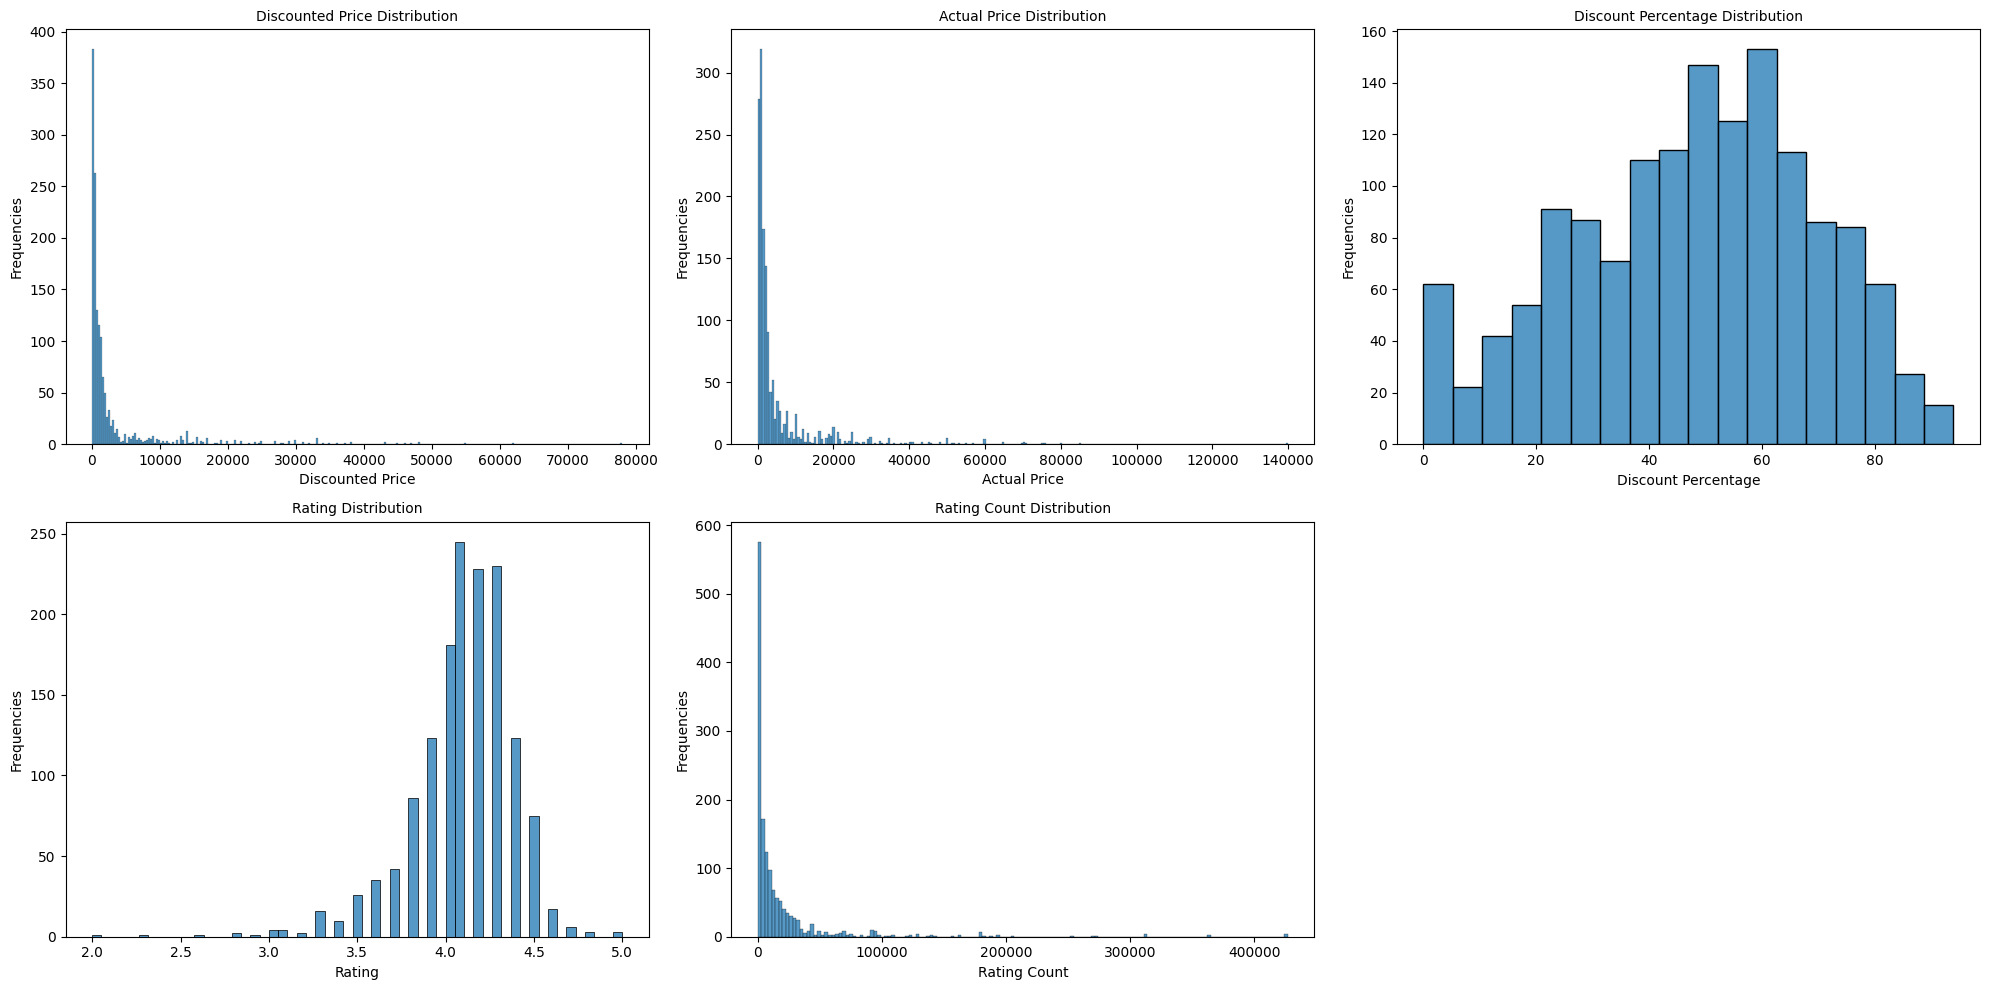

In [31]:
numeric_columns= df_viz.select_dtypes(include = ['int64', 'float64']).columns
plt.figure(figsize = (20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2,3, i)
    sns.histplot(df_viz, x = col, legend = False)
    plt.title(f'{col} Distribution', fontsize = 10)
    plt.xlabel(col, fontsize  = 10)
    plt.ylabel('Frequencies', fontsize  = 10)

plt.tight_layout()
plt.show()

In [32]:
df_explode_category = df_amazon.assign(category = df_amazon['category'].str.split('|')).explode('category')
df_explode_category.duplicated(subset = 'product_id').sum()

4956

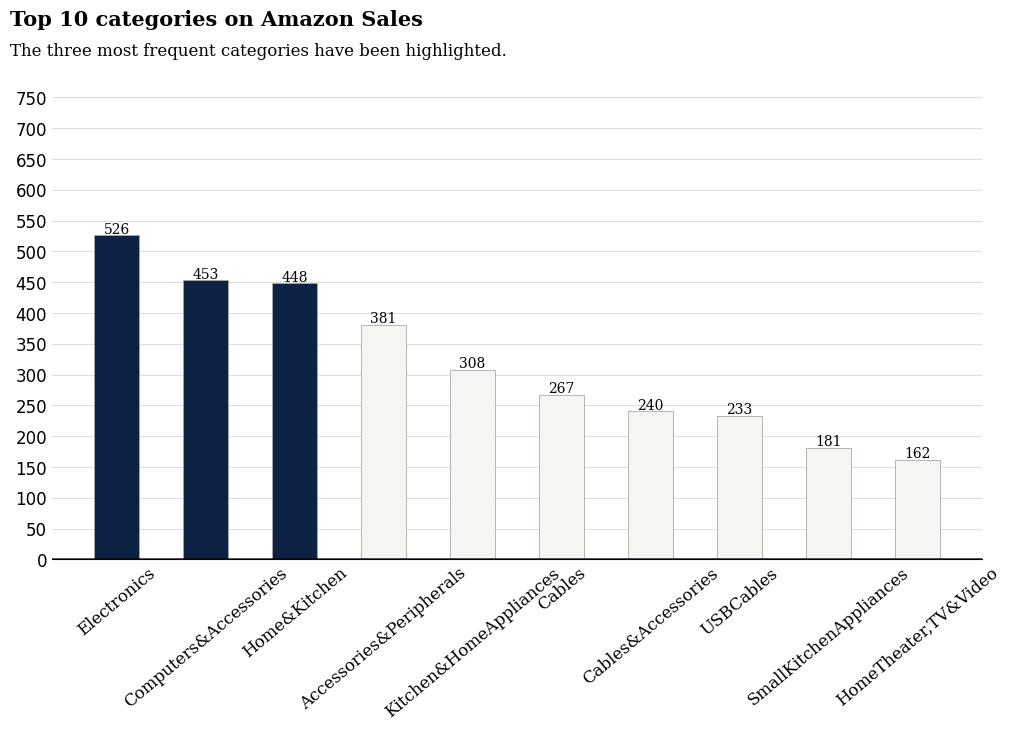

In [33]:
category_distribution = df_explode_category.groupby('category').size().sort_values(ascending = False)[:10]
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = '#0B2245' 
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(category_distribution.index, category_distribution, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in category_distribution.index:
    ax.annotate(f"{category_distribution[i]}", 
                   xy=(i, category_distribution[i] + 10),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.set_xticks(category_distribution.index)
ax.set_xticklabels(category_distribution.index, fontfamily='serif', rotation=40)
fig.text(0.09, 1, 'Top 10 categories on Amazon Sales', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent categories have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 800, 50)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

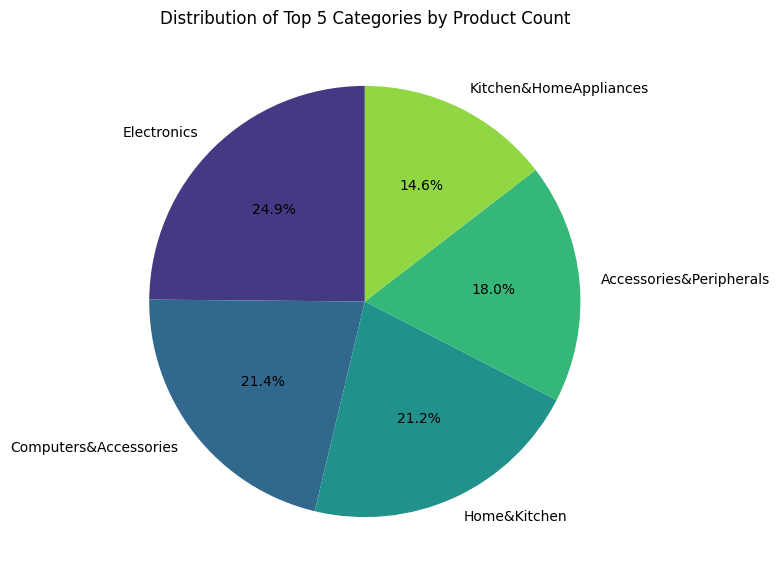

In [34]:
top5_category = df_explode_category['category'].value_counts().head(5)
plt.figure(figsize=(7, 7))
plt.pie(
    top5_category.values,                 
    labels=top5_category.index,         
    autopct='%1.1f%%',          
    startangle=90,               
    colors=sns.color_palette("viridis", 5)
)
plt.title("Distribution of Top 5 Categories by Product Count")
plt.show()

In [35]:
def value_formatter(x, pos):
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x>=1000:
        return f'{x/1000:.1f}K'
    else:
        return int(x)

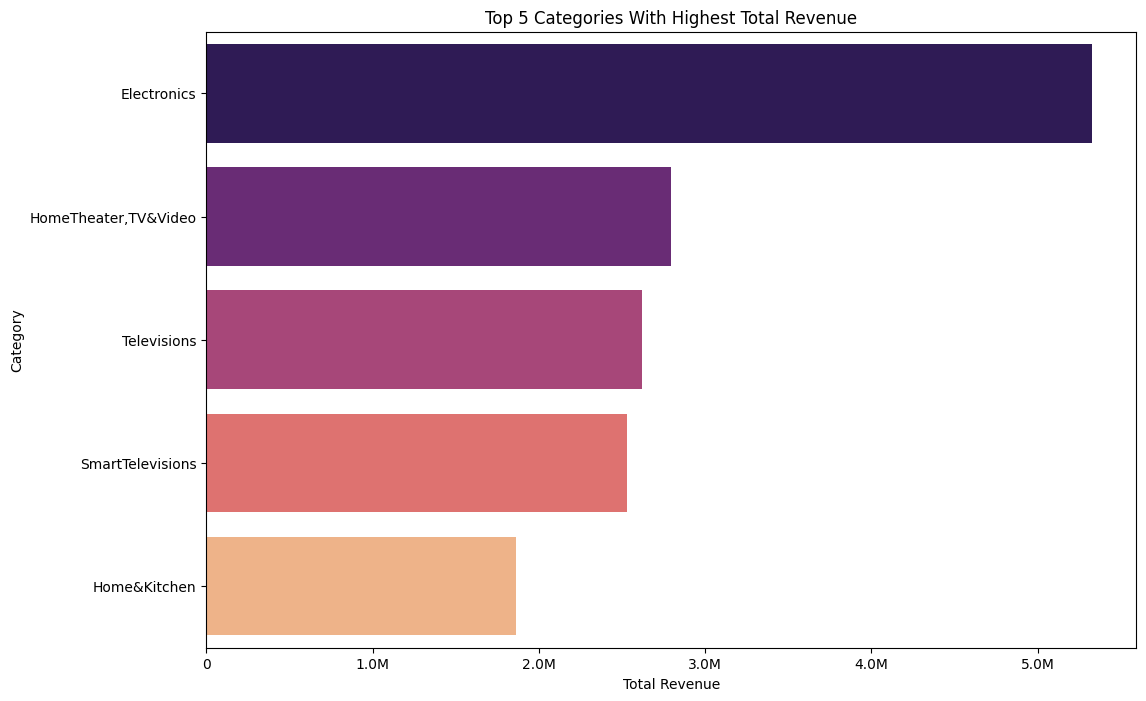

In [36]:
total_revenue = df_explode_category.groupby('category')['actual_price'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=total_revenue.values, y=total_revenue.index, hue=total_revenue.index, legend=False, palette="magma")
ax.xaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title("Top 5 Categories With Highest Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

In [37]:
total_revenue

category
Electronics             5326966.0
HomeTheater,TV&Video    2792181.0
Televisions             2620347.0
SmartTelevisions        2528369.0
Home&Kitchen            1864609.0
Name: actual_price, dtype: float64

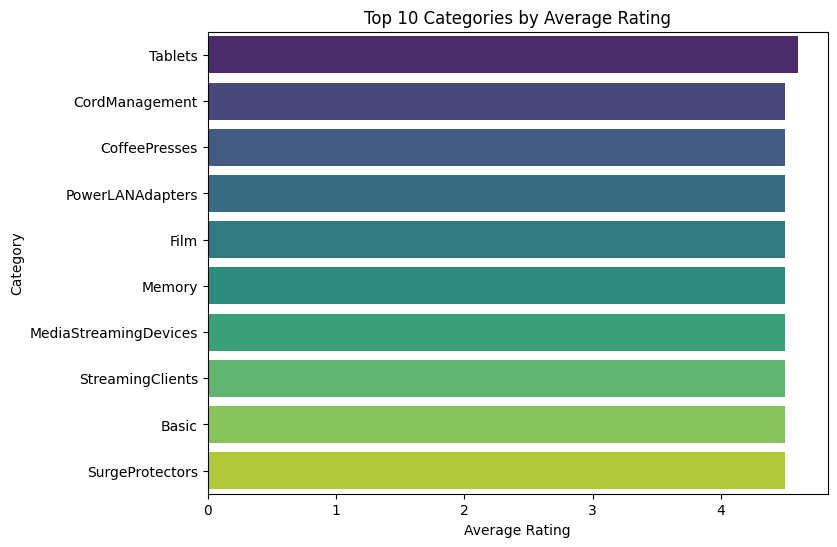

In [38]:
rating_mean = df_explode_category.groupby('category')['rating'].agg(lambda x:x.mean()).sort_values(ascending = False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x = rating_mean.values, y = rating_mean.index, orient = 'h', hue=rating_mean.index, legend=False, palette = 'viridis')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

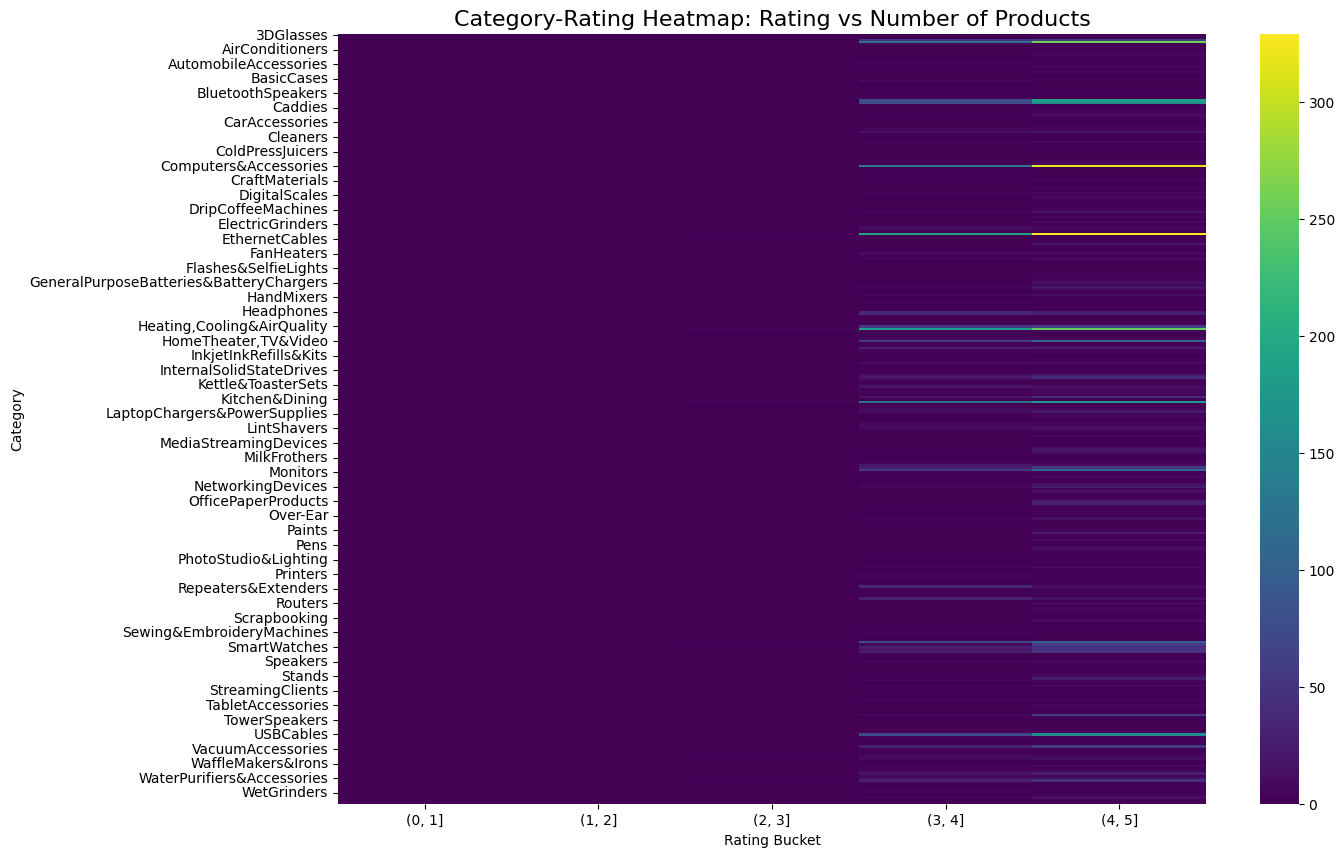

rating_bucket            (0, 1]  (1, 2]  (2, 3]  (3, 4]  (4, 5]
category                                                       
3DGlasses                     0       0       0       1       0
AVReceivers&Amplifiers        0       0       0       1       0
Accessories                   0       0       1      51      59
Accessories&Peripherals       0       0       1     122     258
Adapters                      0       0       0       3       2
...                         ...     ...     ...     ...     ...
WetGrinders                   0       0       0       2       0
WireboundNotebooks            0       0       0       0       4
WirelessUSBAdapters           0       0       0       5      13
WoodenPencils                 0       0       0       0       1
YogurtMakers                  0       0       0       0       1

[317 rows x 5 columns]


In [39]:
df_explode_category['rating_bucket'] = pd.cut(df_explode_category['rating'], bins=[0,1,2,3,4,5])
pivot = pd.pivot_table(df_explode_category, values = 'product_id', index='category', columns='rating_bucket', aggfunc='count')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='viridis')
plt.title("Category-Rating Heatmap: Rating vs Number of Products",fontsize=16)
plt.xlabel('Rating Bucket')
plt.ylabel('Category')
plt.show()
print(pivot)

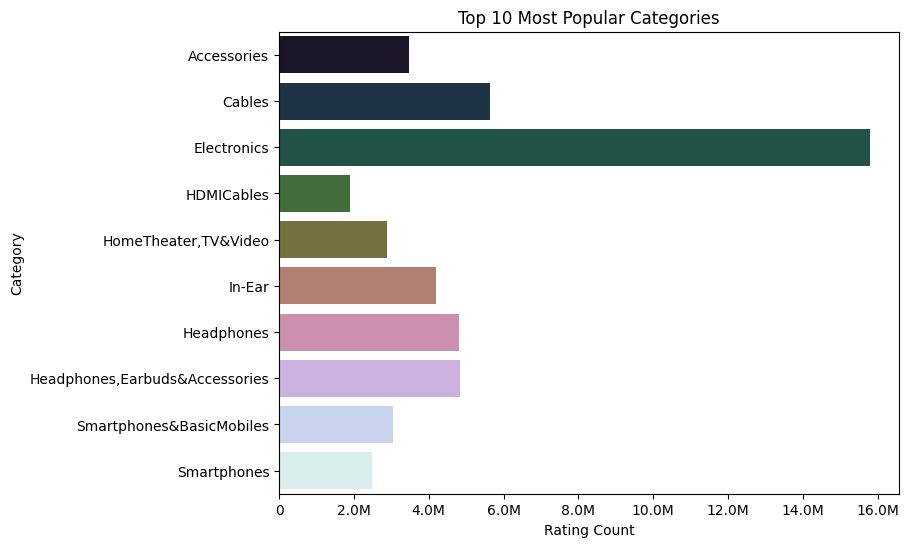

In [40]:
popular_category = df_explode_category.groupby('category')['rating_count'].agg(['sum', 'mean', 'max']).sort_values(by ='max', ascending = False).head(10)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x = popular_category['sum'], y = popular_category.index, orient = 'h', hue=popular_category.index, legend=False, palette = 'cubehelix')
ax.xaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.title('Top 10 Most Popular Categories')
plt.xlabel('Rating Count')
plt.ylabel('Category')
plt.show()

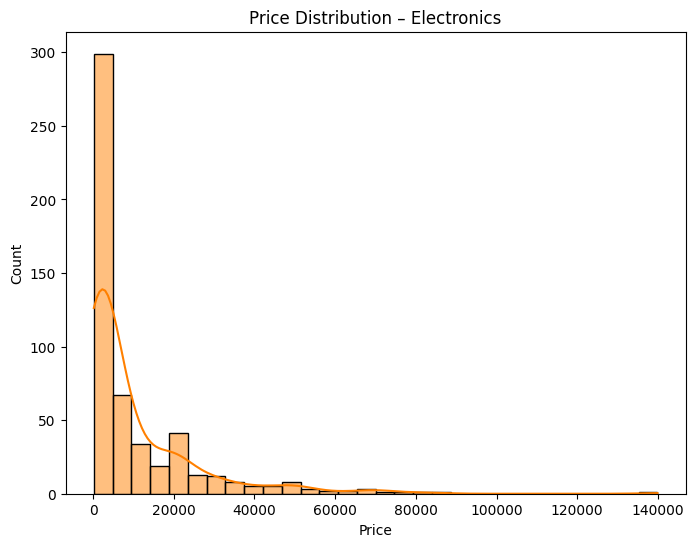

In [41]:
tv = df_explode_category[df_explode_category['category'] == 'Electronics']
plt.figure(figsize=(8,6))
sns.histplot(tv['actual_price'], bins=30, kde=True, color='#FF8000')
plt.title("Price Distribution – Electronics")
plt.xlabel("Price")
plt.show()

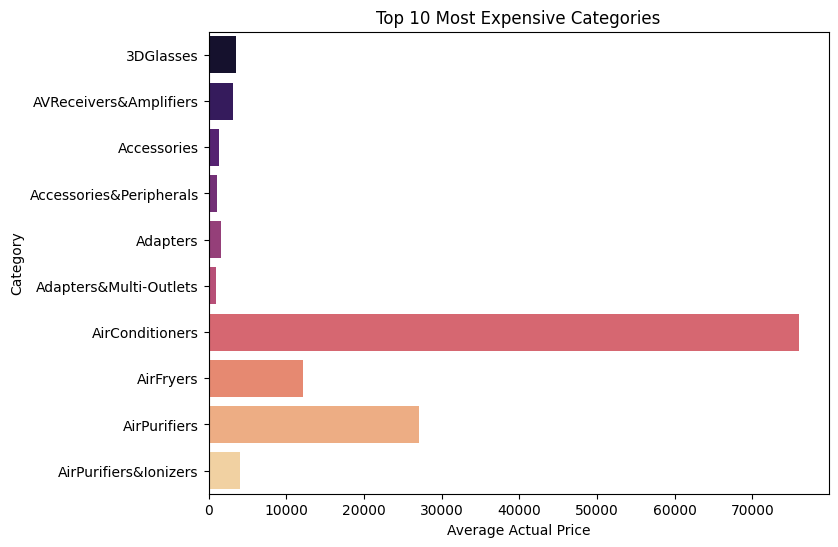

In [42]:
actual_price_mean = df_explode_category.groupby('category')['actual_price'].agg(lambda x:x.mean()).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x = actual_price_mean.values, y = actual_price_mean.index, orient = 'h', hue=actual_price_mean.index, legend=False, palette = 'magma')
plt.title('Top 10 Most Expensive Categories')
plt.xlabel('Average Actual Price')
plt.ylabel('Category')
plt.show()

In [43]:
df_explode_category['discount'] = ((df_explode_category['actual_price'] - df_explode_category['discounted_price']) / df_explode_category['actual_price']) * 100

<Axes: title={'center': 'Difference Between Dataset Discount and Real Discount (Top 10)'}, xlabel='Category', ylabel='Real Discount and Dataset Discount'>

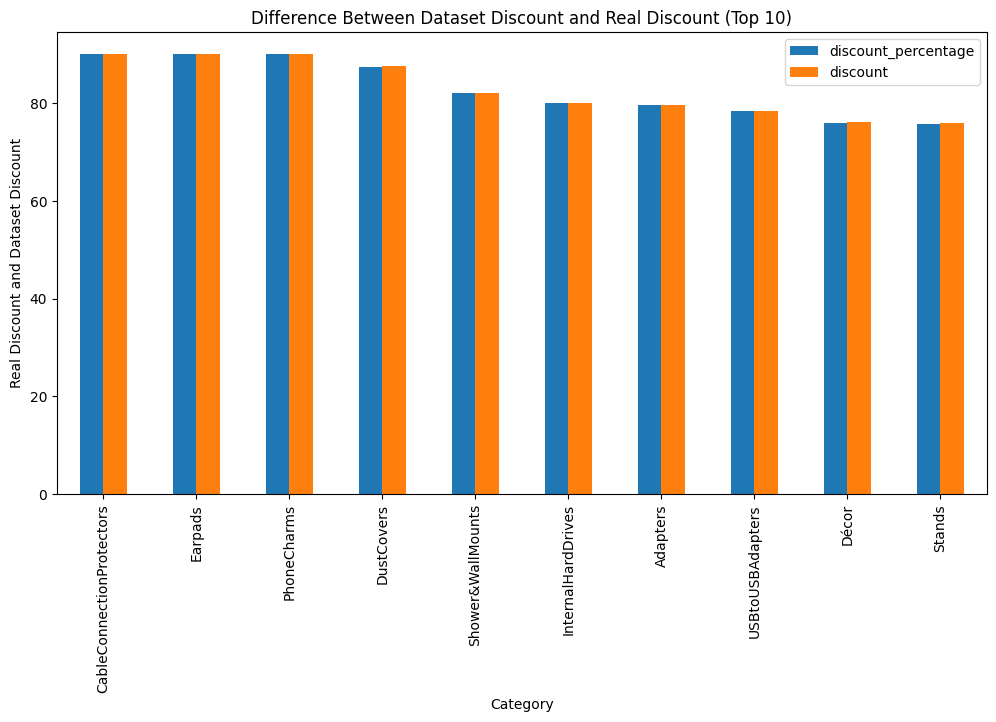

In [44]:
df_explode_category.groupby('category')[['discount_percentage', 'discount']].agg(lambda x:x.mean()).sort_values(by = ['discount_percentage', 'discount'], ascending = False).head(10).plot(kind='bar', title = 'Difference Between Dataset Discount and Real Discount (Top 10)', xlabel = 'Category', ylabel = 'Real Discount and Dataset Discount', figsize=(12, 6))

In [45]:
df_unique = df_amazon.groupby('product_id').agg({
    'product_name':'first',
    'discount_percentage': 'max'
}).drop_duplicates(subset = 'product_name', keep = 'first')

top5 = df_unique.sort_values(by = 'discount_percentage', ascending = False).head()
top5['short_product_name'] = top5['product_name'].apply(lambda x: x if len(x) < 28 else x[:25] + '...')
top5

,product_name,discount_percentage,short_product_name
product_id,,,
B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",94.0,rts [2 Pack] Mini USB C T...
B0BF4YBLPX,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,Fire-Boltt Ninja Call Pro...
B0B61DSF17,beatXP Kitchen Scale Multipurpose Portable Ele...,90.0,beatXP Kitchen Scale Mult...
B085HY1DGR,Sounce Spiral Charger Cable Protector Data Cab...,90.0,Sounce Spiral Charger Cab...
B08X77LM8C,"Silicone Rubber Earbuds Tips, Eartips, Earpads...",90.0,Silicone Rubber Earbuds T...


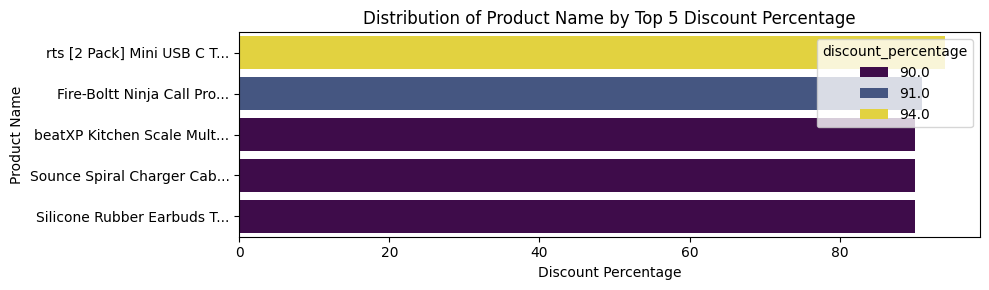

In [46]:
plt.figure(figsize = (10,3))
sns.barplot(data = top5,
           y = 'short_product_name',
            x = 'discount_percentage',
            hue = 'discount_percentage',
            palette = 'viridis'
           )
plt.title('Distribution of Product Name by Top 5 Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

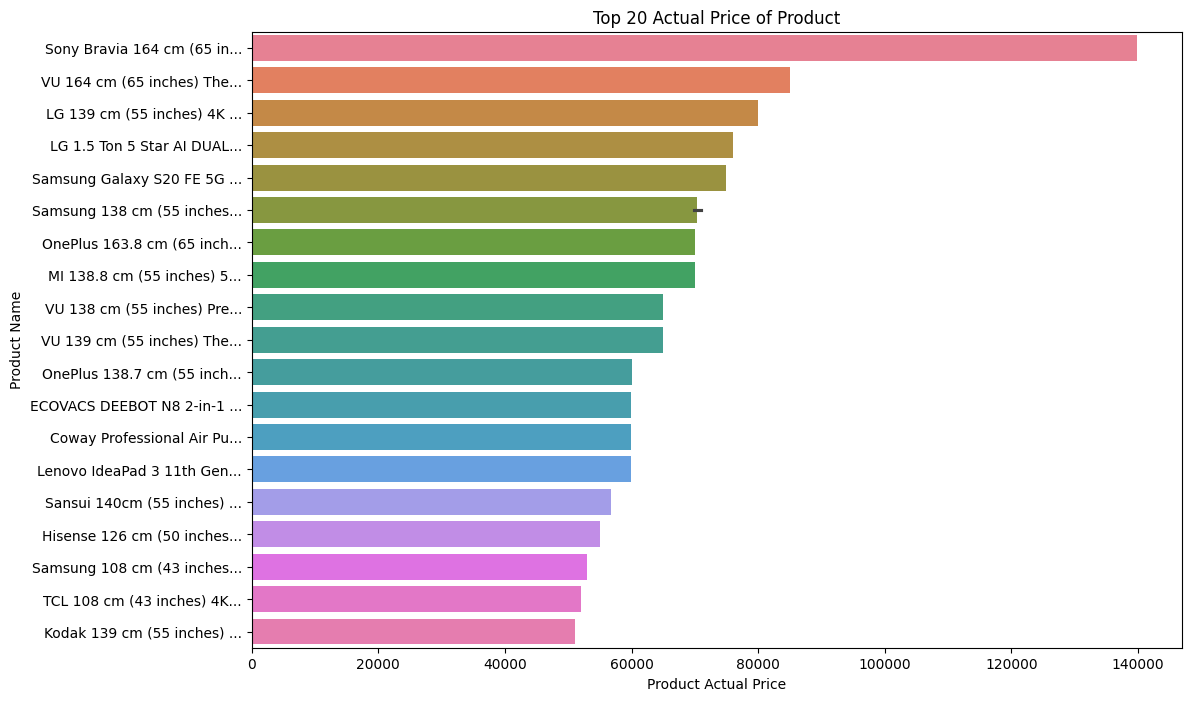

In [47]:
top10 = df_amazon.groupby(['product_id', 'product_name'])['actual_price'].median().reset_index().sort_values(by='actual_price', ascending=False).head(20)
top10['short_product_name'] = top10['product_name'].apply(lambda x: x if len(x) < 28 else x[:25] + '...')
plt.figure(figsize = (12,8))
sns.barplot(x = top10['actual_price'], y = top10['short_product_name'], hue = top10['short_product_name'] )
plt.title("Top 20 Actual Price of Product")
plt.xlabel("Product Actual Price")
plt.ylabel("Product Name")
plt.show()

In [48]:
df_explode_user = df_amazon.assign(user_id = df_amazon['user_id'].str.split(',')).explode('user_id')

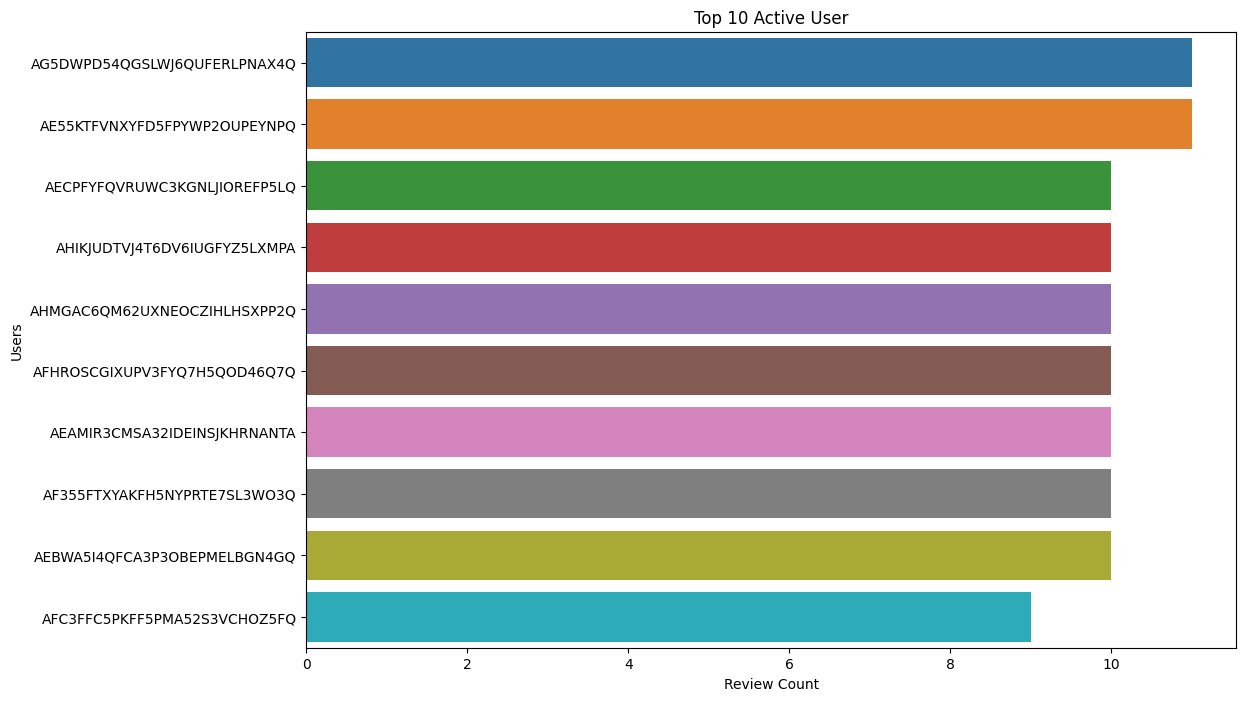

In [49]:
active_user = df_explode_user['user_id'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=active_user.values, y=active_user.index, hue=active_user.index, legend=False)
plt.title("Top 10 Active User")
plt.xlabel("Review Count")
plt.ylabel("Users")
plt.show()

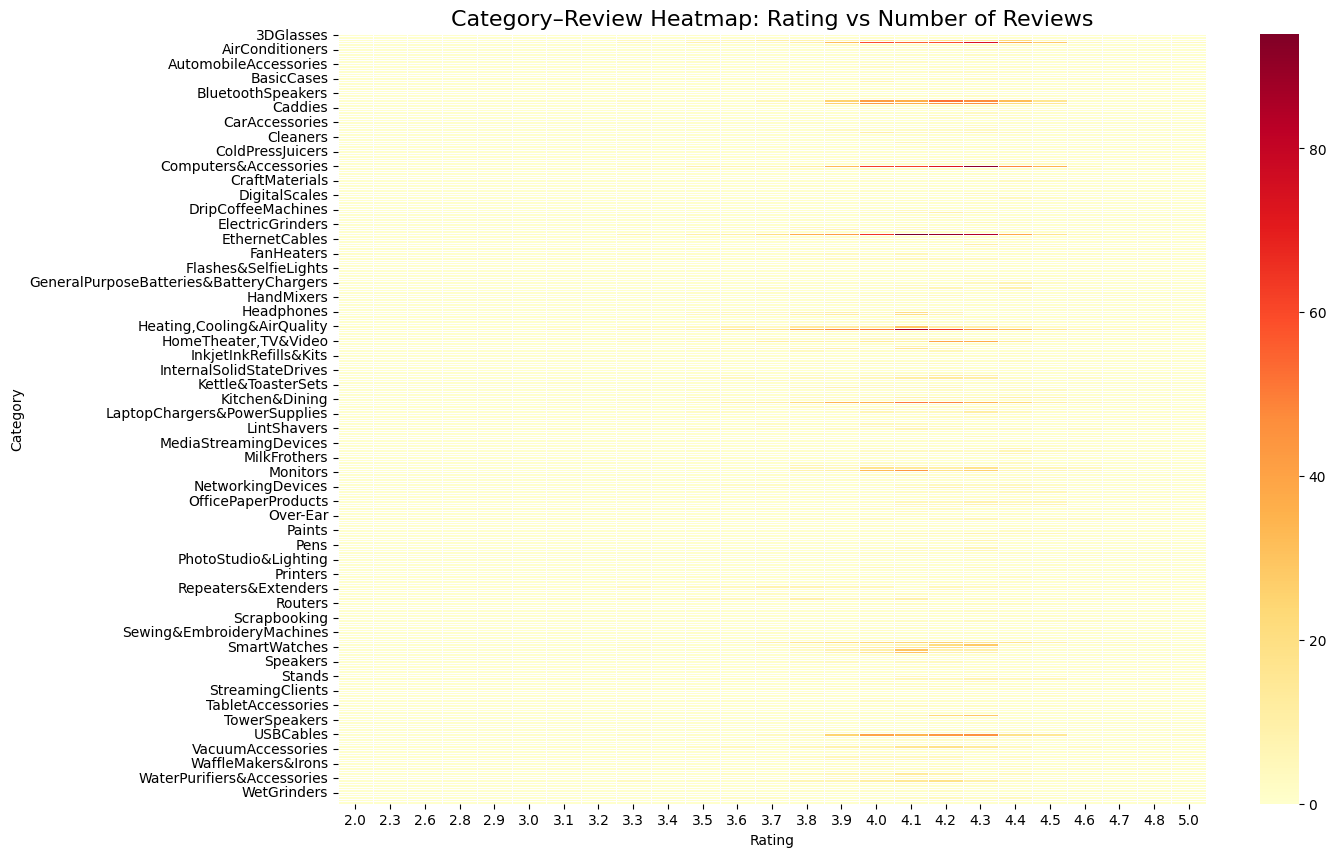

In [50]:
product_review = df_explode_category.groupby(['category', 'rating']).size().unstack(fill_value = 0)
plt.figure(figsize=(14, 10))
sns.heatmap(product_review, cmap="YlOrRd", linewidths=0.5)
plt.title("Category–Review Heatmap: Rating vs Number of Reviews", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Category")
plt.show()

In [51]:
top_positive = df_explode_user[df_explode_user['rating'] == 5]['user_id'].value_counts()
top_positive

user_id
AF7EOXYL5K36BDP6PXF6K2TL5TPA    1
AEN7NV2P5WNHM7EXCWWWES43N3PQ    1
AFFCNMMFC5VPKDGX5FGNODAS6Z6Q    1
AFQJM63Q7OMAP62BP3TB4YQEZAXA    1
AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ    1
AGJC5O5H5BBXWUV7WRIEIOOR3TVQ    1
AFLLEPVLIAH2DFSHAZ77KWFM72ZA    1
AHY2YZWK63CNZ626MC3TFQRBB7RA    1
AG3PG2EM3MIT6IYPS5KZRIAF4QDQ    1
AE2KS6ZY376YMGX7RNKV7VXUEGFQ    1
AHUPZTSAPO7GABNBTIBDYNFKYFKQ    1
AENQGQZ4L2CTB7HT4QUUZB3IJO6A    1
AFZDZGWHZNPZ3VLECIBYSFUDGT4A    1
AGOYRUEHDI3SH7N4KBLQS4KE6G2A    1
Name: count, dtype: int64

In [52]:
top_negative = df_explode_user[df_explode_user['rating'] <= 2]['user_id'].value_counts()
top_negative

user_id
AGHT3K4KSG5MAQUSXRDT5VNB73GA    1
AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ    1
Name: count, dtype: int64

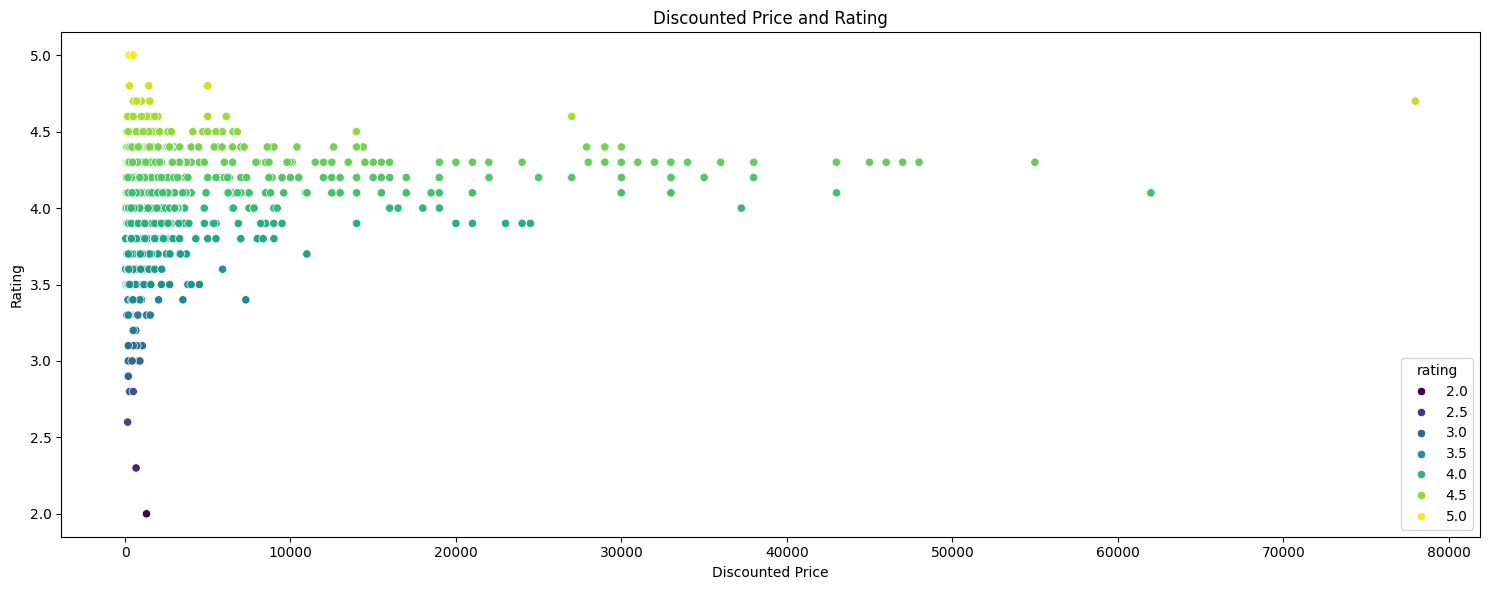

In [53]:
plt.figure(figsize = (15,6))
sns.scatterplot(data = df_amazon, x = 'discounted_price', y  = 'rating', hue = 'rating', palette = 'viridis')
plt.title("Discounted Price and Rating", fontsize=12)
plt.xlabel('Discounted Price', fontsize=10)
plt.ylabel("Rating", fontsize=10)

plt.tight_layout()
plt.show()